In [32]:
# import tensor flow as tf


In [8]:
#%%                                A. Call libraries

#        $ source activate theano
#        $ ipython
# OR in Windows
#       > conda activate tensorflow_env
#       > atom


# 1.0 Data manipulation library
#     Install in 'tf' environment
#     conda install -c anaconda pandas
import pandas as pd

# 1.1 Call libraries for image processing
#     Another preprocessing option is text and sequence
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1.2, Libraries for building sequential CNN model
#      A model is composed of sequence of layered objects
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Input

# 1.5 OS related
import os

# 1.6 For ROC plotting
import matplotlib.pyplot as plt

# 1.7
import numpy as np
# conda install scikit-learn
from sklearn import metrics
import time


In [9]:
#%%                            B. Define constants

# 2. Our constants
# 2.1 Dimensions to which our images will be adjusted
img_width, img_height = 150, 150

# 2.2 Data folder containing all training images, maybe in folders: cats and dogs

train_data_dir = "d:\\chest_xray\\train"
test_data_dir =  "d:\\chest_xray\\test"

# 2.3 What is the total number of training images
#      that should be generated (not what are available)
nb_train_samples = 2000   # Actual: 1000 + 1000 (more) =    2000

# 2.4 Data folder containing all validation images

validation_data_dir = "d:\\chest_xray\\val"

# 2.5 What is the total no of validation samples that should
#     be generated?
nb_validation_samples = 800   # Actual: 400 + 400 (more) =  800

# Some hyperparameters

# 2.6 Batch size to train at one go:
batch_size = 16             # No of batches = 4000/125 = 32
                            # So per epoch we have 32 batches

# 2.7 How many epochs of training?
epochs = 5                  # For lack of time, let us make it just 5.

# 2.8 No of test samples
test_generator_samples = 300

# 2.9 For test data, what should be batch size
test_batch_size = 25    # This is different from training batch size

# 2.10
input_shape = (img_width, img_height, 3)



Here in path 2 backward slash added instead of one . 

In [10]:
# 4. Create convnet model
#    con->relu->pool->con->relu->pool->con->relu->pool->flatten->fc->fc


model = Sequential()

In [11]:
# 4.1 Add Input layer
model.add(Input(shape = input_shape ))
# 4.2 Add Conv2D layer
model.add(Conv2D(
	             filters=32,                # For every filter there is set of weights
	                                        # For each filter, one bias. So total bias = 32
	             kernel_size=(3, 3),        # For each filter there are 3*3=9 kernel_weights
	             strides = (1,1),           # So output shape will be 148 X 148 (W-F+1).
	                                        # Default strides is 1 only
	             #input_shape=input_shape,   # (150,150,3)
	             use_bias=True,             # Default value is True
	             padding='valid',           # 'valid' => No padding. This is default.
	             name="Ist_conv_layer"
	             )
         )

Here , 896 parameters are obtained comprising of weights and biases .

In [12]:
# 4.3 So what have we done? Can you explain?
#     Total weights = (kernel_weights) * RGB_channel * (filters)  + ToalNoBias
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Ist_conv_layer (Conv2D)     (None, 148, 148, 32)      896       
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [13]:
# 4.4 For each neuron in the convolved network,
#     assign an activation function
#     What is relu? See https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/

model.add(Activation('relu'))           # max {0,x}

# 4.5
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Ist_conv_layer (Conv2D)     (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [14]:
# 4.4 For each neuron in the convolved network,
#     assign an activation function
#     What is relu? See https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/

model.add(Activation('relu'))           # max {0,x}

# 4.5
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Ist_conv_layer (Conv2D)     (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 activation_1 (Activation)   (None, 148, 148, 32)      0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [15]:
# 4.8 Input shape is inferred. Default strides is 1.
#     Note: Activation is specified here only
#     input_shape from top = 74 X 74 X 32

model.add(Conv2D(32,
                (3, 3),
                activation = 'relu',
                name = "IInd_con_layer"))

# 4.9 So how many parameters now?
#     Total weights = (kernel_weights) * (filters_from_earlier_conv) * (filters)  + ToalNoBias
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Ist_conv_layer (Conv2D)     (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 activation_1 (Activation)   (None, 148, 148, 32)      0         
                                                                 
 IInd_con_layer (Conv2D)     (None, 146, 146, 32)      9248      
                                                                 
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
_________________________________________________________________


In [16]:
# model.add(Activation('relu'))

# 4.10 Add another pooling layer:

model.add(MaxPool2D(pool_size=(2, 2)))

# 4.11 Summary?
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Ist_conv_layer (Conv2D)     (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 activation_1 (Activation)   (None, 148, 148, 32)      0         
                                                                 
 IInd_con_layer (Conv2D)     (None, 146, 146, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 32)       0         
 )                                                               
                                                                 
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
____________________________________________________

In [17]:
# 4.12 Add another conv layer but with 64 filters
#      Total weights = (kernel_weights) * (filters_from_earlier_conv) * (filters)  + ToalNoBias

model.add(Conv2D(64, (3, 3), name = "IIIrd_conv_layer"))

# 4.13
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Ist_conv_layer (Conv2D)     (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 activation_1 (Activation)   (None, 148, 148, 32)      0         
                                                                 
 IInd_con_layer (Conv2D)     (None, 146, 146, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 32)       0         
 )                                                               
                                                                 
 IIIrd_conv_layer (Conv2D)   (None, 71, 71, 64)        18496     
                                                        

In [18]:
# 4.14
model.add(Activation('relu'))

# 4.15
model.add(MaxPool2D(pool_size=(2, 2)))

# 4.16 Flattens the input. Does not affect the batch size.
#      It merely flattens the earlier layer without adding any weight
#     See summary() next
#     https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten

model.add(Flatten(name = "FlattenedLayer"))

# 4.17
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Ist_conv_layer (Conv2D)     (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 activation_1 (Activation)   (None, 148, 148, 32)      0         
                                                                 
 IInd_con_layer (Conv2D)     (None, 146, 146, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 32)       0         
 )                                                               
                                                                 
 IIIrd_conv_layer (Conv2D)   (None, 71, 71, 64)        18496     
                                                        

In [19]:
# 4.18 Dense layer having 64 units
#      dimensionality of the output space.
#      Total weights = hidden_neurons * input_size + bias_foreach_hidden_neurons
#      64 * 18496 + 64
#      Most number of weights come from this layer
#      https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

model.add(Dense(64))

# 4.19
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Ist_conv_layer (Conv2D)     (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 activation_1 (Activation)   (None, 148, 148, 32)      0         
                                                                 
 IInd_con_layer (Conv2D)     (None, 146, 146, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 32)       0         
 )                                                               
                                                                 
 IIIrd_conv_layer (Conv2D)   (None, 71, 71, 64)        18496     
                                                        

In [20]:
# 4.20
model.add(Activation('relu'))

# Dropout
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout
model.add(Dropout(0.5))

# 4.21
model.summary()


# 4.22 Dense layer having 1 unit
#      dimensionality of the output space.
#      Weights = No of input neurons + bias (64+1)
model.add(Dense(1))

# 4.23
model.summary()

# 4.24
model.add(Activation('sigmoid'))    # tanh vs sigmoid? See Stackoverflow


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Ist_conv_layer (Conv2D)     (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 activation_1 (Activation)   (None, 148, 148, 32)      0         
                                                                 
 IInd_con_layer (Conv2D)     (None, 146, 146, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 32)       0         
 )                                                               
                                                                 
 IIIrd_conv_layer (Conv2D)   (None, 71, 71, 64)        18496     
                                                        

In [21]:
# 4.25 Compile model
model.compile(
              loss='binary_crossentropy',  # Metrics to be adopted by convergence-routine
              optimizer='rmsprop',         # Strategy for convergence?
              metrics=['accuracy'])        # Metrics, I am interested in




In [22]:
# 5.2 Config1: Augmentation configuration for training samples
#     Instantiate ImageDataGenerator object with requisite configuration
#     https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

tr_dtgen = ImageDataGenerator(
                              rescale=1. / 255,      # Normalize colour intensities in 0-1 range
                              shear_range=0.2,       # Shear varies from 0-0.2
                              zoom_range=0.2,
                              horizontal_flip=True,
                              )

In [23]:

# 5.3 Config2: Create iterator from 'train_datagen'.
#     We use flow() or flow_from_directory() methods to further
#     configure and return an iterator object.
#     See at the end of code: Differences between flow()
#     and flow_from_directory
#     Pl see: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory

train_generator = tr_dtgen.flow_from_directory(
                                               train_data_dir,       # Data folder of cats & dogs
                                               target_size=(img_width, img_height),  # Resize images
                                               batch_size=batch_size,  # Return images in batches
                                               class_mode='binary'   # Output labels will be 1D binary labels
                                                                     # [[1],[0],[0],[1]]
                                                                     # If 'categorical' output labels will be
                                                                     # 2D OneHotEncoded: [[1,0],[0,1],[0,1],[1,0]]
                                                                     # If 'binary' use 'sigmoid' at output
                                                                     # If 'categorical' use softmax at output

                                                )


Found 5216 images belonging to 2 classes.


In [24]:

# 5.4 Augmentation configuration we will use
#     for validation. Only rescaling of pixels

val_dtgen = ImageDataGenerator(rescale=1. / 255)

In [25]:

# 5.4.1 validation data
validation_generator = val_dtgen.flow_from_directory(
                                                     validation_data_dir,
                                                     target_size=(img_width, img_height),   # Resize images
                                                     batch_size=batch_size,    # batch size to augment at a time
                                                     class_mode='binary'  # Return 1D array of class labels
                                                     )

Found 16 images belonging to 2 classes.


In [26]:
# 6.2 fit_generator() directly pulls data from iterators
#     But number of images cannot exceed those available
#     Ref: https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit_generator

start = time.time()
history = model.fit_generator(
                              # First argument is always data generator
                              generator = train_generator,
                              # How many batches per epoch?
                              # Can be any number as generator loops indefinitely
                              steps_per_epoch=nb_train_samples // batch_size,
                              # No of epochs
                              epochs=epochs,
                              # Get validation data from validation generator
                              validation_data=validation_generator,
                              verbose = 1,
                              validation_steps=nb_validation_samples // batch_size
                              )

end = time.time()
(end - start)/60  # 7min


C:\Users\ubuntu\AppData\Local\Temp\ipykernel_35140\1986851873.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/5
125/125 [==============================] - 40s 309ms/step - loss: 0.6670 - accuracy: 0.7220 - val_loss: 1.2165 - val_accuracy: 0.5000
Epoch 2/5
125/125 [==============================] - 40s 316ms/step - loss: 0.4009 - accuracy: 0.8330
Epoch 3/5
125/125 [==============================] - 39s 311ms/step - loss: 0.3125 - accuracy: 0.8625
Epoch 4/5
125/125 [==============================] - 40s 321ms/step - loss: 0.2679 - accuracy: 0.8840
Epoch 5/5
125/125 [==============================] - 39s 314ms/step - loss: 0.2916 - accuracy: 0.8795


3.3069111824035646

In [27]:
# 7.0 Model evaluation

# 7.1 Using generator
#     https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate
result = model.evaluate(
                        validation_generator,
                        verbose = 1,
                        steps = 4        # How many batches
                        )


# 7.1.1
result     # ['loss', 'accuracy']

4/4 [==============================] - 0s 5ms/step - loss: 0.5258 - accuracy: 0.8750


[0.5258169770240784, 0.875]

In [28]:
# 8.0 Make predictions

# 8.1 Using generator
#     https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict
pred = model.predict(validation_generator, steps = 2)

# 8.1.1
pred[:5]


2/2 [==============================] - 0s 26ms/step


array([[0.7254809 ],
       [0.9988144 ],
       [0.08912027],
       [0.19483057],
       [0.7389087 ]], dtype=float32)

In [29]:
# 9.0 Augmentation configuration we will use
#     for test-data. Only rescaling of pixels

test_dtgen = ImageDataGenerator(rescale=1. / 255)

# 9.0.1 Test data

test_generator = test_dtgen.flow_from_directory(
                                                test_data_dir,
                                                # Resize images
                                                target_size=(img_width, img_height),
                                                # batch size to augment at a time
                                                batch_size=batch_size,
                                                # Return 1D array of class labels
                                                class_mode='binary'
                                                )

Found 624 images belonging to 2 classes.


In [30]:
# 9.0.2 Get iterator
#       and a batch of (images, image_labels)
im = test_generator    # Get iterator
images = next(im)      # Get images
images[0].shape

(16, 150, 150, 3)

1/1 [==============================] - 0s 104ms/step


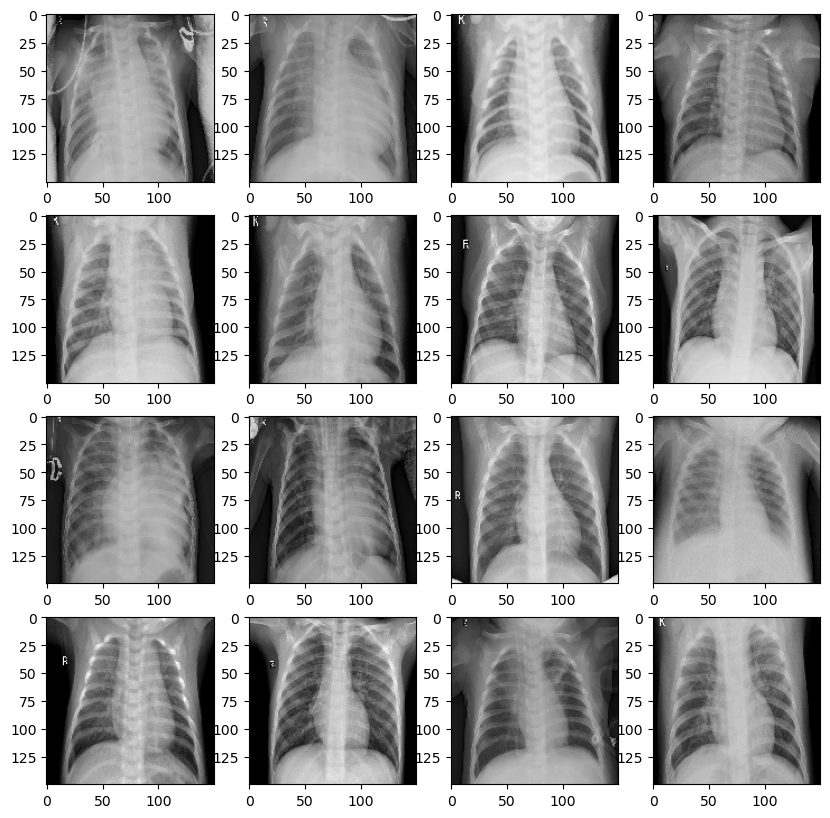

[[0.9999962 ]
 [0.99997157]
 [0.98858535]
 [0.21486501]
 [0.9909963 ]
 [0.97800535]
 [0.18722019]
 [0.5729002 ]
 [0.99996126]
 [0.9996856 ]
 [0.7216962 ]
 [0.8231448 ]
 [0.87882733]
 [0.16816692]
 [0.51751906]
 [0.90887594]]


In [31]:
# 9.1 Make predictions
results = model.predict(images[0])

# 9.2 Plot the images and check with
#     results
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.figure(figsize= (10,10))
for i in range(results.shape[0]):
    plt.subplot(4,4,i+1)
    _=imshow(images[0][i]) ;

plt.show() ;
# 9.3 Predicted labels
print(results)         # Probability values
                       # > 0.5 is Dog